In [2]:
import pandas as pd
df_gene_info = pd.read_csv('data/gene_info.txt', sep='\t')       # Metadata for genes (the features of the data matrices)
df_gene_info = df_gene_info[['pr_gene_symbol','pr_is_lm']]
df_sig_info = pd.read_csv('data/sig_info.txt', sep='\t')  
df_sig_info     # Metadata for level 5 profiles
df_sig_info = df_sig_info[['sig_id', 'pert_iname', 'pert_type', 'cell_id', 'pert_itime']]
# rename cmap_name to gene_symbol
df_sig_info = df_sig_info.rename(columns={'pert_iname': 'pr_gene_symbol'})

In [3]:
# create control group dataframe with rows where pert_type contains 'ctl'
df_control = df_sig_info[df_sig_info['pert_type'].str.contains('ctl')]
df_compound = df_sig_info[df_sig_info['pert_type'].str.contains('trt_cp')]
# create a new dataframe with the rows where pert_type either contains oe, sh, or xpr
df_oe_sh_xpr = df_sig_info[df_sig_info['pert_type'].str.contains('oe|sh|xpr')]

In [4]:
# print the shapes of the dataframes
print("Shape of df_gene_info:", df_gene_info.shape)
print("Shape of df_sig_info:", df_sig_info.shape)
print("Shape of df_control:", df_control.shape)
print("Shape of df_compound:", df_compound.shape)
print("Shape of df_oe_sh_xpr:", df_oe_sh_xpr.shape)

Shape of df_gene_info: (12328, 2)
Shape of df_sig_info: (118050, 5)
Shape of df_control: (6764, 5)
Shape of df_compound: (107404, 5)
Shape of df_oe_sh_xpr: (3882, 5)


In [5]:
#print len of df_sig_info
print(df_sig_info.shape)
df_sig_info = df_sig_info[df_sig_info["pert_type"].str.contains("ctl") != True]
print(df_sig_info.shape)

(118050, 5)
(111286, 5)


In [6]:
df_experiments_with_targets = df_sig_info.merge(df_gene_info, on='pr_gene_symbol', how='left')
print(df_experiments_with_targets.shape)
df_experiments_with_targets

(111286, 6)


,sig_id,pr_gene_symbol,pert_type,cell_id,pert_itime,pr_is_lm
0,LJP005_A375_24H:A07,CP-724714,trt_cp,A375,24 h,NaN
1,LJP005_A375_24H:A08,CP-724714,trt_cp,A375,24 h,NaN
2,LJP005_A375_24H:A09,CP-724714,trt_cp,A375,24 h,NaN
3,LJP005_A375_24H:A10,CP-724714,trt_cp,A375,24 h,NaN
4,LJP005_A375_24H:A11,CP-724714,trt_cp,A375,24 h,NaN
...,...,...,...,...,...,...
111281,XPR002_YAPC.311_96H:F18,INSM2,trt_xpr,YAPC.311,96 h,NaN
111282,XPR002_YAPC.311_96H:G22,SMAD4,trt_xpr,YAPC.311,96 h,0.0
111283,XPR002_YAPC.311_96H:G23,EGFR,trt_xpr,YAPC.311,96 h,1.0
111284,XPR002_YAPC.311_96H:M15,EXO1,trt_xpr,YAPC.311,96 h,0.0


In [7]:
#print unique value cout of pr_gene_symbol in df_experiments_with_targets anf df_gene_info
print("Unique pr_gene_symbol in df_experiments_with_targets:", df_experiments_with_targets['pr_gene_symbol'].nunique())
print("Unique pr_gene_symbol in df_gene_info:", df_gene_info['pr_gene_symbol'].nunique())
print("Shape of df_experiments_with_targets:", df_experiments_with_targets.shape)
print("Shape of df_gene_info:", df_gene_info.shape)

Unique pr_gene_symbol in df_experiments_with_targets: 1821
Unique pr_gene_symbol in df_gene_info: 12328
Shape of df_experiments_with_targets: (111286, 6)
Shape of df_gene_info: (12328, 2)


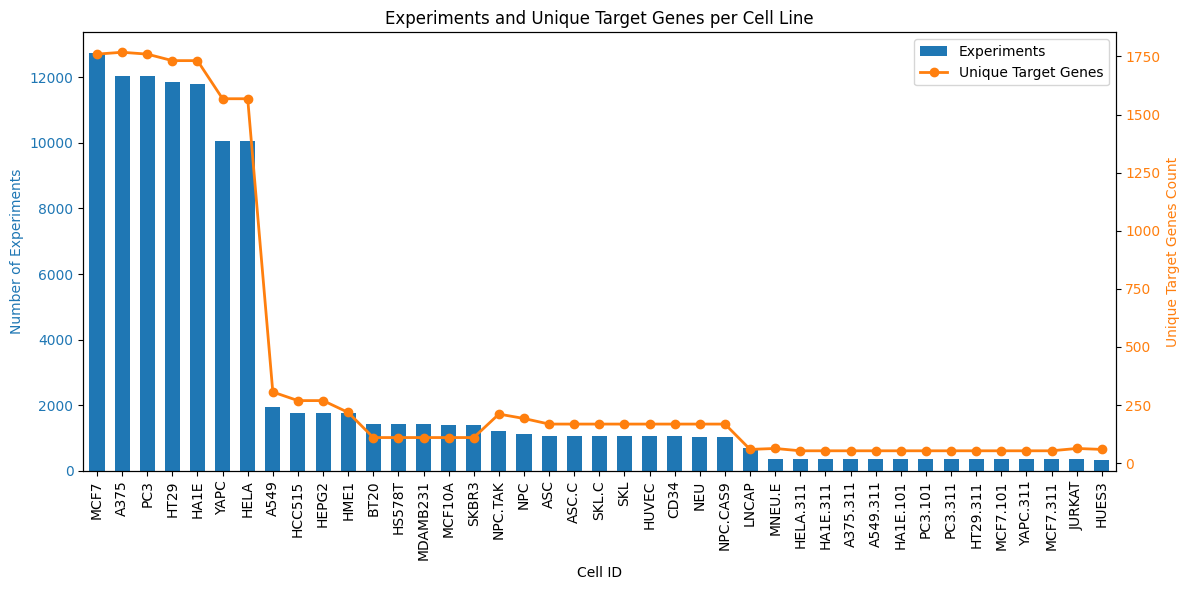

In [11]:
# sort the bars by experiment count (descending) and plot experiments (bars) + unique targets (line)
import matplotlib.pyplot as plt
assert 'df_experiments_with_targets' in globals(), "df_experiments_with_targets not found. Run earlier cells that create it."
assert 'plt' in globals(), "matplotlib.pyplot (plt) is not imported. Run the cell that imports it (e.g. `import matplotlib.pyplot as plt`)."

df = df_experiments_with_targets
required = {'cell_id', 'pr_gene_symbol'}
assert required.issubset(df.columns), f"DataFrame must contain columns: {required}"
assert len(df) > 0, "df_experiments_with_targets is empty."

# compute counts (explicitly sort by experiment count descending)
exp_counts = df['cell_id'].value_counts().sort_values(ascending=False)
unique_targets = df.groupby('cell_id')['pr_gene_symbol'].nunique().reindex(exp_counts.index)

assert len(exp_counts) == len(unique_targets), "Mismatch between experiment counts and unique target counts."

# plot
fig, ax = plt.subplots(figsize=(12, 6))
exp_counts.plot(kind='bar', color='tab:blue', ax=ax, width=0.6, label='Experiments')

ax.set_xlabel('Cell ID')
ax.set_ylabel('Number of Experiments', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

# align line plot with bar positions (0..N-1)
ax2 = ax.twinx()
x_pos = range(len(unique_targets))
ax2.plot(x_pos, unique_targets.values, color='tab:orange', marker='o', linestyle='-', linewidth=2, label='Unique Target Genes')
ax2.set_ylabel('Unique Target Genes Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax.set_xticks(x_pos)
ax.set_xticklabels(exp_counts.index, rotation=90)

# combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Experiments and Unique Target Genes per Cell Line')
plt.tight_layout()
plt.show()

In [12]:
mapk=["AKT1","AKT2","AKT3","ARRB1","ARRB2","ATF2","ATF4","BDNF","BRAF","CACNA1A","CACNA1B","CACNA1C","CACNA1D","CACNA1E","CACNA1F","CACNA1G","CACNA1H","CACNA1I","CACNA1S","CACNA2D1","CACNA2D2","CACNA2D3","CACNA2D4","CACNB1","CACNB2","CACNB3","CACNB4","CACNG1","CACNG2","CACNG3","CACNG4","CACNG5","CACNG6","CACNG7","CACNG8","CASP3","CD14","CDC25B","CDC42","CHP1","CHP2","CHUK","CRK","CRKL","DAXX","DDIT3","DUSP1","DUSP10","DUSP14","DUSP16","DUSP2","DUSP3","DUSP4","DUSP5","DUSP6","DUSP7","DUSP8","DUSP9","ECSIT","EGF","EGFR","ELK1","ELK4","FAS","FASLG","FGF1","FGF10","FGF11","FGF12","FGF13","FGF14","FGF16","FGF17","FGF18","FGF19","FGF2","FGF20","FGF21","FGF22","FGF23","FGF3","FGF4","FGF5","FGF6","FGF7","FGF8","FGF9","FGFR1","FGFR2","FGFR3","FGFR4","FLNA","FLNB","FLNC","FOS","GADD45A","GADD45B","GADD45G","GNA12","GNG12","GRB2","HRAS","HSPA1A","HSPA1B","HSPA1L","HSPA2","HSPA6","HSPA8","HSPB1","IKBKB","IKBKG","IL1A","IL1B","IL1R1","IL1R2","JMJD7-PLA2G4B","JUN","JUND","KRAS","LAMTOR3","MAP2K1","MAP2K2","MAP2K3","MAP2K4","MAP2K5","MAP2K6","MAP2K7","MAP3K1","MAP3K11","MAP3K12","MAP3K13","MAP3K14","MAP3K2","MAP3K20","MAP3K3","MAP3K4","MAP3K5","MAP3K6","MAP3K7","MAP3K8","MAP4K1","MAP4K2","MAP4K3","MAP4K4","MAPK1","MAPK10","MAPK11","MAPK12","MAPK13","MAPK14","MAPK3","MAPK7","MAPK8","MAPK8IP1","MAPK8IP2","MAPK8IP3","MAPK9","MAPKAPK2","MAPKAPK3","MAPKAPK5","MAPT","MAX","MECOM","MEF2C","MKNK1","MKNK2","MOS","MRAS","MYC","NF1","NFATC2","NFATC4","NFKB1","NFKB2","NGF","NLK","NR4A1","NRAS","NTF3","NTF4","NTRK1","NTRK2","PAK1","PAK2","PDGFA","PDGFB","PDGFRA","PDGFRB","PLA2G10","PLA2G12A","PLA2G12B","PLA2G1B","PLA2G2A","PLA2G2C","PLA2G2D","PLA2G2E","PLA2G2F","PLA2G3","PLA2G4A","PLA2G4B","PLA2G4E","PLA2G5","PLA2G6","PPM1A","PPM1B","PPP3CA","PPP3CB","PPP3CC","PPP3R1","PPP3R2","PPP5C","PRKACA","PRKACB","PRKACG","PRKCA","PRKCB","PRKCG","PRKX","PTPN5","PTPN7","PTPRR","RAC1","RAC2","RAC3","RAF1","RAP1A","RAP1B","RAPGEF2","RASA1","RASA2","RASGRF1","RASGRF2","RASGRP1","RASGRP2","RASGRP3","RASGRP4","RELA","RELB","RPS6KA1","RPS6KA2","RPS6KA3","RPS6KA4","RPS6KA5","RPS6KA6","RRAS","RRAS2","SOS1","SOS2","SRF","STK3","STK4","STMN1","TAB1","TAB2","TAOK1","TAOK2","TAOK3","TGFB1","TGFB2","TGFB3","TGFBR1","TGFBR2","TNF","TNFRSF1A","TP53","TRAF2","TRAF6"]
print("Number of mapk target genes in gene_info:", sum(gene in mapk for gene in df_gene_info['pr_gene_symbol']))
print(len(mapk))

Number of mapk target genes in gene_info: 243
267


In [16]:
reduced_df_experiments_with_targets = df_experiments_with_targets[df_experiments_with_targets['pr_gene_symbol'].isin(mapk)]
reduced_df_experiments_with_targets

,sig_id,pr_gene_symbol,pert_type,cell_id,pert_itime,pr_is_lm
107404,XPR002_A375.311_96H:A03,AKT2,trt_xpr,A375.311,96 h,0.0
107406,XPR002_A375.311_96H:A06,KRAS,trt_xpr,A375.311,96 h,0.0
107407,XPR002_A375.311_96H:A07,CRKL,trt_xpr,A375.311,96 h,1.0
107409,XPR002_A375.311_96H:A09,CRKL,trt_xpr,A375.311,96 h,1.0
107411,XPR002_A375.311_96H:A11,BRAF,trt_xpr,A375.311,96 h,0.0
...,...,...,...,...,...,...
111268,XPR002_YAPC.311_96H:P15,TP53,trt_xpr,YAPC.311,96 h,1.0
111272,XPR002_YAPC.311_96H:P19,TP53,trt_xpr,YAPC.311,96 h,1.0
111276,XPR002_YAPC.311_96H:P24,TGFBR2,trt_xpr,YAPC.311,96 h,1.0
111278,XPR002_YAPC.311_96H:B24,JUN,trt_xpr,YAPC.311,96 h,1.0


In [13]:
print("Number of p53 target genes in experiments_with_targets:", sum(gene in mapk for gene in df_experiments_with_targets['pr_gene_symbol']))   


Number of p53 target genes in experiments_with_targets: 946


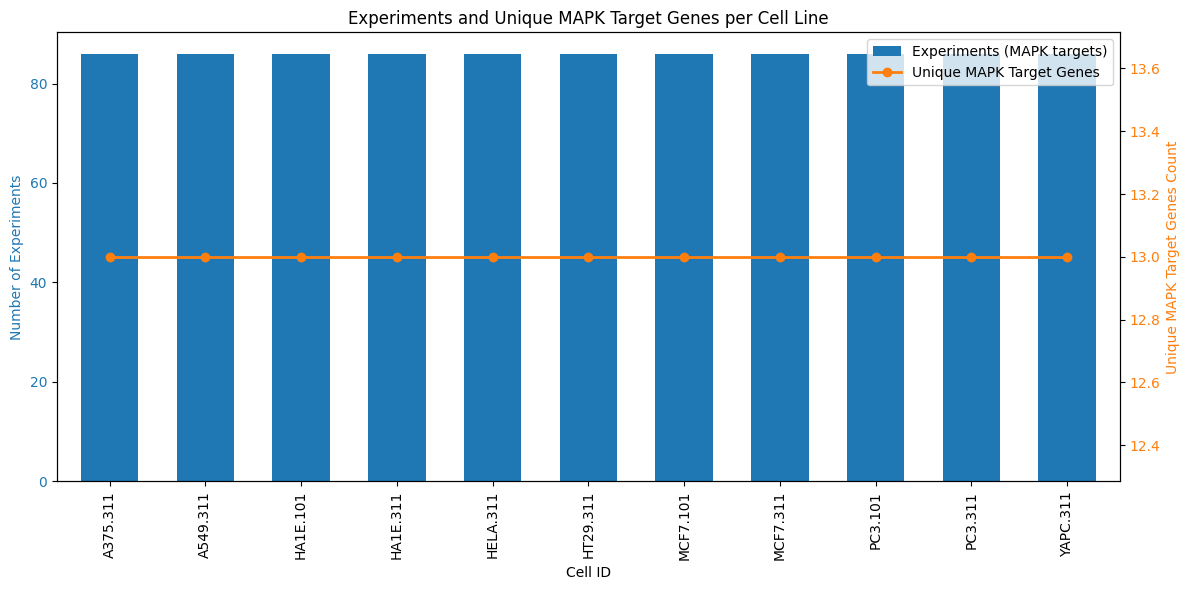

In [14]:
# filter experiments to only those whose pr_gene_symbol is in the MAPK list, then plot experiments (bars) + unique targets (line)
import matplotlib.pyplot as plt
assert 'df_experiments_with_targets' in globals(), "df_experiments_with_targets not found. Run earlier cells that create it."
assert 'mapk' in globals(), "mapk gene list not found. Ensure the cell defining `mapk` has been run."
assert 'plt' in globals(), "matplotlib.pyplot (plt) is not imported. Run the cell that imports it (e.g. `import matplotlib.pyplot as plt`)."

df = df_experiments_with_targets
required = {'cell_id', 'pr_gene_symbol'}
assert required.issubset(df.columns), f"DataFrame must contain columns: {required}"
# create reduced dataframe containing only MAPK-targeted experiments
reduced_df_experiments_with_targets = df[df['pr_gene_symbol'].isin(mapk)]
assert len(reduced_df_experiments_with_targets) > 0, "No rows found with pr_gene_symbol in `mapk`. Check inputs."

# compute counts (explicitly sort by experiment count descending)
exp_counts = reduced_df_experiments_with_targets['cell_id'].value_counts().sort_values(ascending=False)
unique_targets = reduced_df_experiments_with_targets.groupby('cell_id')['pr_gene_symbol'].nunique().reindex(exp_counts.index)

assert len(exp_counts) == len(unique_targets), "Mismatch between experiment counts and unique target counts."

# plot
fig, ax = plt.subplots(figsize=(12, 6))
exp_counts.plot(kind='bar', color='tab:blue', ax=ax, width=0.6, label='Experiments (MAPK targets)')

ax.set_xlabel('Cell ID')
ax.set_ylabel('Number of Experiments', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax.twinx()
x_pos = range(len(unique_targets))
ax2.plot(x_pos, unique_targets.values, color='tab:orange', marker='o', linestyle='-', linewidth=2, label='Unique MAPK Target Genes')
ax2.set_ylabel('Unique MAPK Target Genes Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax.set_xticks(x_pos)
ax.set_xticklabels(exp_counts.index, rotation=90)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Experiments and Unique MAPK Target Genes per Cell Line')
plt.tight_layout()
plt.show()


In [17]:
# store the 500 most common pr_gene_symbol in df_experiments_with_targets in a list
top_500_genes = df_experiments_with_targets['pr_gene_symbol'].value_counts().nlargest(500).index.tolist()
print(df_experiments_with_targets.shape)
reduced_df_experiments_with_targets = df_experiments_with_targets[df_experiments_with_targets['pr_gene_symbol'].isin(top_500_genes)]
print(reduced_df_experiments_with_targets.shape)

(111286, 6)
(56926, 6)


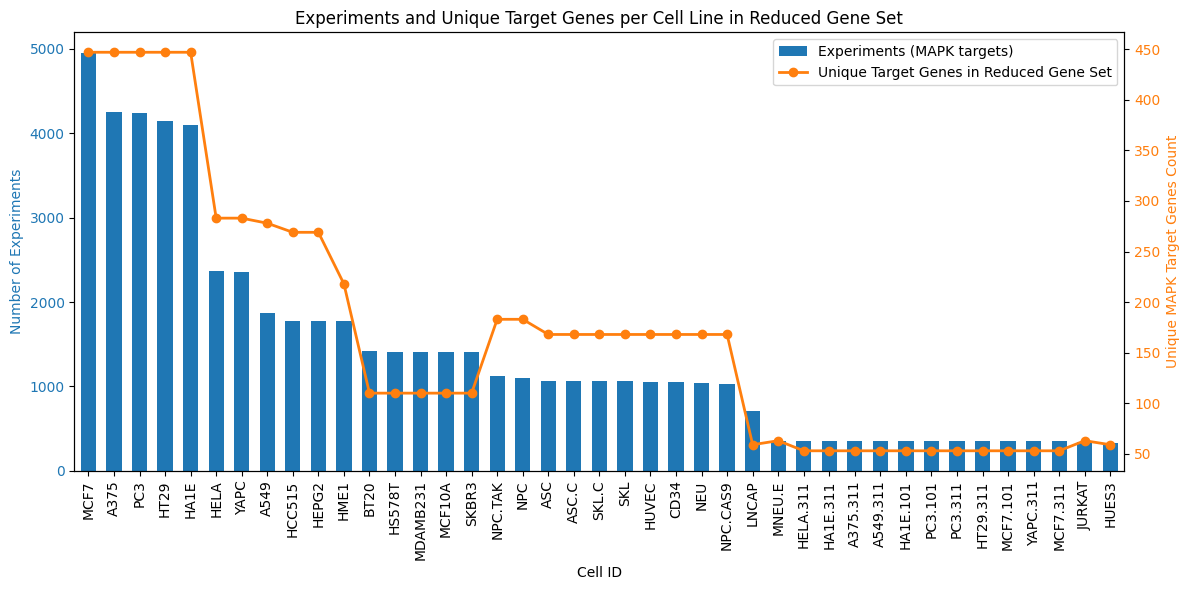

In [ ]:

# compute counts (explicitly sort by experiment count descending)
exp_counts = reduced_df_experiments_with_targets['cell_id'].value_counts().sort_values(ascending=False)
unique_targets = reduced_df_experiments_with_targets.groupby('cell_id')['pr_gene_symbol'].nunique().reindex(exp_counts.index)

assert len(exp_counts) == len(unique_targets), "Mismatch between experiment counts and unique target counts."

# plot
fig, ax = plt.subplots(figsize=(12, 6))
exp_counts.plot(kind='bar', color='tab:blue', ax=ax, width=0.6, label='Experiments')

ax.set_xlabel('Cell ID')
ax.set_ylabel('Number of Experiments', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax.twinx()
x_pos = range(len(unique_targets))
ax2.plot(x_pos, unique_targets.values, color='tab:orange', marker='o', linestyle='-', linewidth=2, label='Unique Target Genes in Reduced Gene Set')
ax2.set_ylabel('Unique MAPK Target Genes Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax.set_xticks(x_pos)
ax.set_xticklabels(exp_counts.index, rotation=90)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Experiments and Unique Target Genes per Cell Line in Reduced Gene Set')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_experiments_with_targets['cell_id'].value_counts().plot(kind='bar')
plt.xlabel('Cell ID')
plt.ylabel('Number of Experiments')
plt.title('Number of Experiments per Cell Line')
plt.show()

In [ ]:
# do a left join on df_oe_sh_xpr and df_gene_info on gene_symbol
df_oe_sh_xpr_OG = df_oe_sh_xpr.copy()
df_oe_sh_xpr = df_oe_sh_xpr.merge(df_gene_info, on='pr_gene_symbol', how='inner')

# print n experiments with known target
print("Number of experiments with known target:", len(df_oe_sh_xpr))

Number of experiments with known target: 3673


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of rows with feature_space and the number of rows with feature_space == NaN
df_counts = df_oe_sh_xpr.groupby(['pert_type', 'feature_space']).size().unstack(fill_value=0)
df_counts = df_counts.reset_index()
df_counts = df_counts.melt(id_vars='pert_type', var_name='feature_space', value_name='count')
# create a barplot with two bars per pert_type. one counting the rows with feature_space and one counting the rows with feature_space == NaN
plt.figure(figsize=(10, 6))
sns.barplot(x='pert_type', y='count', hue='feature_space', data=df_counts)
plt.title('Counts of feature_space by pert_type')
plt.xlabel('pert_type')
plt.ylabel('count')
plt.legend(title='feature_space')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



KeyError: 'feature_space'

In [ ]:
# create a dataframe with one row per gene_symbol and the number of experiments with that gene_symbol as well as the feature_space
df_counts = df_oe_sh_xpr.groupby(['gene_symbol', 'feature_space']).size().reset_index(name='count')
# sort the dataframe by count
df_counts = df_counts.sort_values(by='count', ascending=False)
df_counts


,gene_symbol,feature_space,count
1112,COASY,landmark,801
2324,HADH,landmark,751
769,CCNA2,landmark,740
372,ASAH1,landmark,692
1610,EGFR,landmark,646
...,...,...,...
6245,ZNF821,best inferred,1
6246,ZNF83,best inferred,1
6251,ZSCAN12,best inferred,1
6252,ZSCAN2,inferred,1


In [ ]:
# save the dataframe to a csv file
df_counts.to_csv('../data/target_counts.csv', index=False)

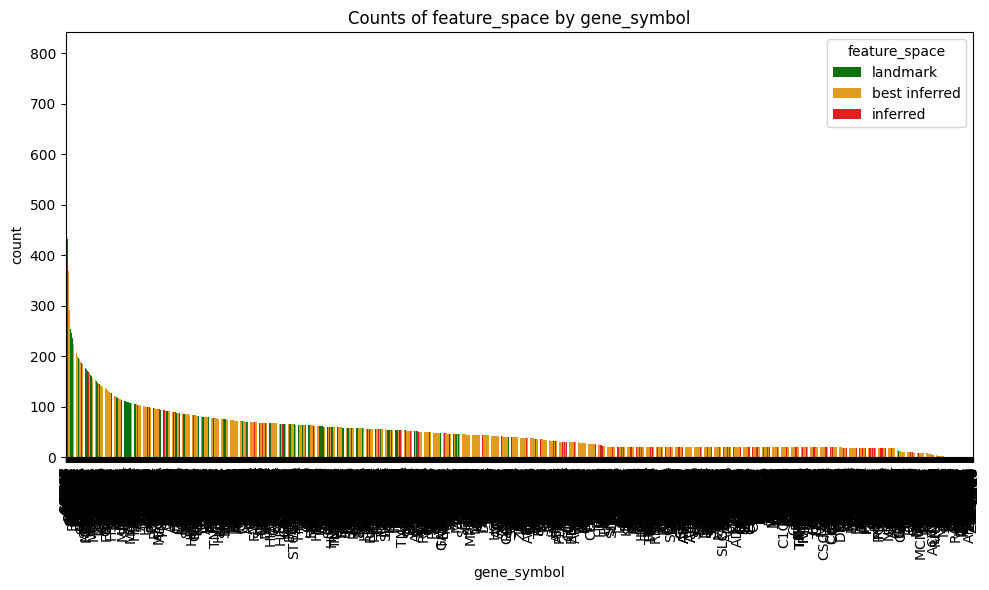

In [ ]:
# create a barplot plotting the count per gene_symbol. the bar should be colored according to the feature_space
# create a color palette with 3 colors. green = landmark orange = best inferred red = inferred

palette = {'landmark': 'green', 'best inferred': 'orange', 'inferred': 'red'}
plt.figure(figsize=(10, 6))
sns.barplot(x='gene_symbol', y='count', hue='feature_space', data=df_counts, palette=palette)
plt.title('Counts of feature_space by gene_symbol')
plt.xlabel('gene_symbol')
plt.ylabel('count')
plt.legend(title='feature_space')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  